In [3]:
import pandas as pd
import pandasql as ps
from pandasql import load_births
from sqlalchemy import text
import sqlite3

In [37]:
brands = pd.read_csv('C:/Users/Msi/Desktop/CALISMALAR/SQL ENG/Data/brands.csv')
categories = pd.read_csv('C:/Users/Msi/Desktop/CALISMALAR/SQL ENG/Data/categories.csv')
customer = pd.read_csv('C:/Users/Msi/Desktop/CALISMALAR/SQL ENG/Data/customers.csv')
order_item = pd.read_csv('C:/Users/Msi/Desktop/CALISMALAR/SQL ENG/Data/order_items.csv')
order = pd.read_csv('C:/Users/Msi/Desktop/CALISMALAR/SQL ENG/Data/orders.csv')
staff = pd.read_csv('C:/Users/Msi/Desktop/CALISMALAR/SQL ENG/Data/staffs.csv')
stock = pd.read_csv('C:/Users/Msi/Desktop/CALISMALAR/SQL ENG/Data/stocks.csv')
stores = pd.read_csv('C:/Users/Msi/Desktop/CALISMALAR/SQL ENG/Data/stores.csv')
products = pd.read_csv('C:/Users/Msi/Desktop/CALISMALAR/SQL ENG/Data/products.csv')

In [ ]:
print(ps.sqldf("SELECT * FROM brands ",locals()))

   brand_id    brand_name
0         1       Electra
1         2          Haro
2         3        Heller
3         4   Pure Cycles
4         5       Ritchey
5         6       Strider
6         7  Sun Bicycles
7         8         Surly
8         9          Trek


![Ekran görüntüsü 2023-12-15 234933.png](<attachment:Ekran görüntüsü 2023-12-15 234933.png>)
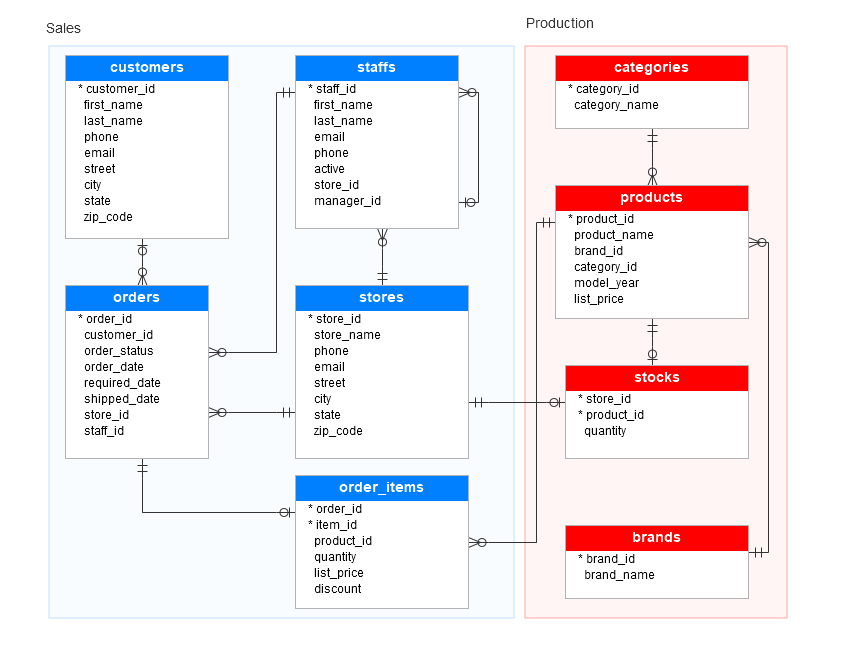

<B><H1>FIND A EACH BRANDS'PRODUCT NAME AND ITS MOST EXPENSIVE STUFF</H1></B>

In [ ]:
Query_brandsand_products = """
SELECT brands.brand_name, products.product_name,products.list_price
from brands 
LEFT JOIN products on brands.brand_id = products.brand_id 
GROUP BY brands.brand_name order by products.list_price Desc

"""

In [ ]:
print(ps.sqldf(Query_brandsand_products,locals()))

     brand_name                                      product_name  list_price
0        Heller                    Heller Bloodhound Trail - 2018     2599.00
1          Trek                                  Trek 1120 - 2018     2499.99
2         Surly                   Surly Big Dummy Frameset - 2017      999.99
3       Electra  Electra Amsterdam Fashion 3i Ladies' - 2017/2018      899.99
4       Ritchey                Ritchey Timberwolf Frameset - 2016      749.99
5   Pure Cycles                   Pure Cycles Vine 8-Speed - 2016      429.00
6  Sun Bicycles                  Sun Bicycles Atlas X-Type - 2017      416.99
7          Haro                           Haro Downtown 16 - 2017      329.99
8       Strider            Strider Classic 12 Balance Bike - 2018       89.99


![Ekran görüntüsü 2023-12-15 234933.png](<attachment:Ekran görüntüsü 2023-12-15 234933.png>)
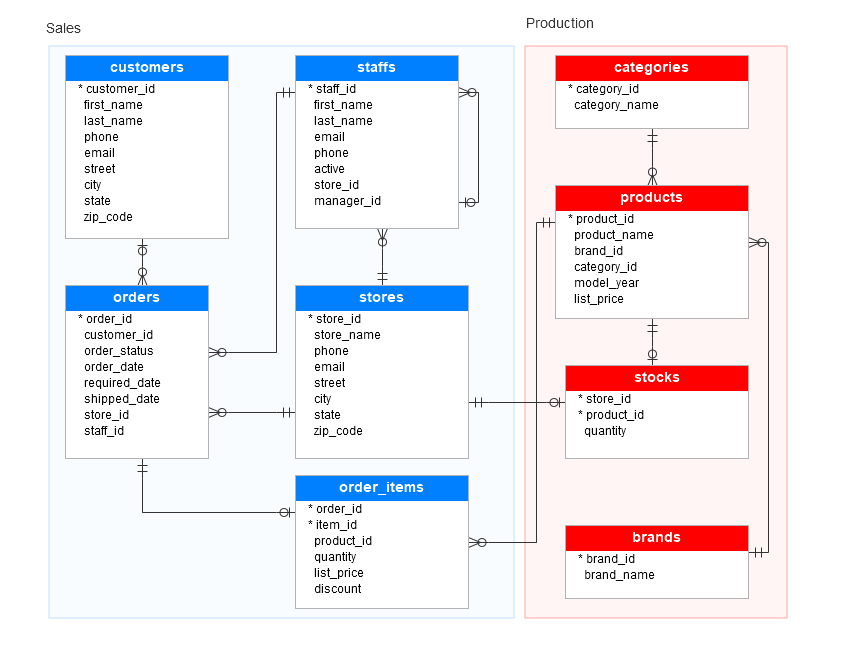

In [ ]:
Query_brandsand_products2 = """
SELECT brands.brand_name, 
products.product_name,
AVG(products.list_price) AS AVG,
order_item.quantity AS QUANTITY
from brands 
JOIN order_item on order_item.product_id= products.product_id 
JOIN products on brands.brand_id = products.brand_id 
WHERE QUANTITY = 1
GROUP BY brands.brand_name
order by products.list_price ASC
 """

In [ ]:

print(ps.sqldf(Query_brandsand_products2,locals()))

     brand_name                                    product_name          AVG  \
0       Strider                 Strider Strider 20 Sport - 2018   198.561429   
1          Haro                         Haro Downtown 16 - 2017   640.173486   
2   Pure Cycles                 Pure Cycles Vine 8-Speed - 2016   442.000000   
3  Sun Bicycles                 Sun Bicycles Streamway 3 - 2017   550.655272   
4       Electra  Electra Townie Original 7D EQ - Women's - 2016   534.186111   
5       Ritchey              Ritchey Timberwolf Frameset - 2016   749.990000   
6         Surly                 Surly Wednesday Frameset - 2016  1151.140927   
7        Heller                    Heller Shagamaw Frame - 2016  1389.454821   
8          Trek                        Trek Fuel EX 8 29 - 2016  2701.733265   

   QUANTITY  
0         1  
1         1  
2         1  
3         1  
4         1  
5         1  
6         1  
7         1  
8         1  


In [ ]:
Query_brandsand_products3 = """
SELECT 
products.product_name AS NAME ,
order_item.quantity AS QUATITY,
order_item.list_price,
order_item.discount,
(order_item.list_price - (order_item.discount * order_item.list_price)) AS DISCOUNTED_PRICE
from order_item 
LEFT JOIN products on order_item.product_id= products.product_id 
WHERE order_item.quantity= 1
GROUP BY products.product_name
ORDER BY order_item.list_price DESC
LIMIT 10
 """

In [ ]:
print(ps.sqldf(Query_brandsand_products3,locals()))

                                     NAME  QUATITY  list_price  discount  \
0           Trek Domane SLR 9 Disc - 2018        1    11999.99      0.07   
1           Trek Domane SLR 8 Disc - 2018        1     7499.99      0.20   
2        Trek Silque SLR 8 Women's - 2017        1     6499.99      0.05   
3  Trek Domane SL Frameset Women's - 2018        1     6499.99      0.05   
4          Trek Domane SL Frameset - 2018        1     6499.99      0.10   
5        Trek Silque SLR 7 Women's - 2017        1     5999.99      0.20   
6           Trek Domane SLR 6 Disc - 2017        1     5499.99      0.20   
7            Trek Domane SL 8 Disc - 2018        1     5499.99      0.05   
8                  Trek Remedy 9.8 - 2017        1     5299.99      0.07   
9       Trek Fuel EX 9.8 27.5 Plus - 2017        1     5299.99      0.10   

   DISCOUNTED_PRICE  
0        11159.9907  
1         5999.9920  
2         6174.9905  
3         6174.9905  
4         5849.9910  
5         4799.9920  
6        

SQL LITE

In [4]:

conn = sqlite3.connect('chinook.db')

In [5]:
cur = conn.cursor()

In [9]:
albums = cur.execute("Select * from albums limit 10").fetchall() # Fethcall is used to retrieve all rows for which the query is returned as a list.
print(albums)

[(1, 'For Those About To Rock We Salute You', 1), (2, 'Balls to the Wall', 2), (3, 'Restless and Wild', 2), (4, 'Let There Be Rock', 1), (5, 'Big Ones', 3), (6, 'Jagged Little Pill', 4), (7, 'Facelift', 5), (8, 'Warner 25 Anos', 6), (9, 'Plays Metallica By Four Cellos', 7), (10, 'Audioslave', 8)]


In [10]:
type(albums)

list

In [11]:
df_album = pd.read_sql_query("Select * from albums",conn)

In [12]:
df_album


,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


In [13]:
## see all table names at chinook
pd.read_sql_query("select name from sqlite_master where type = 'table';",conn)

,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists


In [16]:
qry='''
    Select a.name as Artist,
    title as Album,
    t.name as Song
    from albums r
    join artists a
    on r.artistid = a.artistid
    join  tracks t
    on r.albumid = t.albumid
    order by a.name,title
    limit 10

   '''

In [19]:
pd.read_sql_query(qry,conn,index_col=['Artist'])

,Album,Song
Artist,,
AC/DC,For Those About To Rock We Salute You,For Those About To Rock (We Salute You)
AC/DC,For Those About To Rock We Salute You,Put The Finger On You
AC/DC,For Those About To Rock We Salute You,Let's Get It Up
AC/DC,For Those About To Rock We Salute You,Inject The Venom
AC/DC,For Those About To Rock We Salute You,Snowballed
AC/DC,For Those About To Rock We Salute You,Evil Walks
AC/DC,For Those About To Rock We Salute You,C.O.D.
AC/DC,For Those About To Rock We Salute You,Breaking The Rules
AC/DC,For Those About To Rock We Salute You,Night Of The Long Knives


In [25]:
conn.close()

In [26]:
conn = sqlite3.connect('chinook.db')

In [27]:
cur = conn.cursor()

In [29]:

pd.read_sql_query("Select * from albums ",conn)

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


In [30]:
cur.execute('''
            INSERT INTO albums Values(348,'DOGAC','276')
            ''')

            
conn.commit()

In [31]:
pd.read_sql_query("Select * from albums  Where Albumid = 348",conn)

,AlbumId,Title,ArtistId
0,348,DOGAC,276


In [34]:

cur.execute('''
            DELETE FROM albums WHERE Albumid='348';
            ''')

            
conn.commit()

In [35]:
pd.read_sql_query("Select * from albums  Where Albumid = 348",conn)

,AlbumId,Title,ArtistId


In [41]:
conn.close()


Data frame save to sqlite

In [42]:
customer.head(4)

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553


In [52]:
dbconn = sqlite3.connect('TRY')

In [54]:
cursor = dbconn.cursor()

In [62]:
customer.to_sql('customer_db',con=dbconn,if_exists='append')

1445

In [68]:
pd.read_sql_query("Select * from customer_db limit 5",dbconn)

,index,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820


convert to db to df


In [77]:
new=pd.read_sql_query("Select * from customer_db limit 5",dbconn)

In [88]:
new = new.iloc[:, 1:]

In [89]:
new

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820


3 + 8 = 11
